In [1]:
"""
Created on Thu Oct 15 14:10:27 2020

@author: RachelCampo
"""

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pyl
import numpy as np
import scipy.constants as const
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [27]:
data = pd.read_csv('error_list.csv', sep = ',', index_col = False)

Let's try recalculating BH mass for the MgII line

In [57]:
def mass_bh(lum, fwhm, a = 0.660, b = 0.53):
    mbh = 10**(a + b*np.log10(lum/1e44) + 2*np.log10(fwhm))
    return mbh

In [58]:
data['Black Hole Mass Using MgII (Solar Mass)'] = mass_bh(data['Luminosity Using MgII (erg/s)'], data['Full Width Half Max Using MgII (km/s)'])

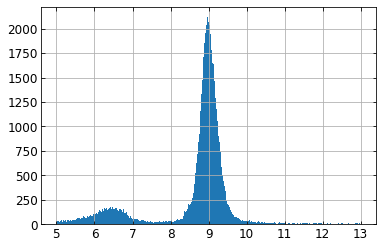

In [59]:
np.log10(data['Black Hole Mass Using MgII (Solar Mass)']).hist(bins='fd', range=[5,13])

In [65]:
bhm_n = data.loc[:, 'Black Hole Mass Using CIV (Solar Mass)'].values
C4_L_values = data.loc[:, 'Luminosity Using CIV (ergs/s)'].values
bhm_std = data.loc[:, 'Black Hole Mass Using CIV Error'].values
C4_L_std = data.loc[:, 'Luminosity Using CIV Error'].values
c4_line = data.loc[:, 'Line Shift of CIV (km/s)'].values
c4_std = data.loc[:, 'Error of CIV Line Shift'].values
c4_fwhm = data.loc[:, 'Full Width Half Max Using CIV (km/s)'].values
c4_fwhm_std = data.loc[:, 'Full Width Half Max Using CIV Error'].values

bhm_mg = data.loc[:, 'Black Hole Mass Using MgII (Solar Mass)'].values
Mg_L_values = data.loc[:, 'Luminosity Using MgII (erg/s)'].values
bhm_mg_std = data.loc[:, 'Black Hole Mass Using MgII Error'].values
Mg_L_std = data.loc[:, 'Luminosity Using MgII Error'].values
mg_line = data.loc[:, 'Line Shift of MgII (km/s)'].values
mg_std = data.loc[:, 'Error of MgII Line Shift'].values
mg_fwhm = data.loc[:, 'Full Width Half Max Using MgII (km/s)'].values
mg_fwhm_std = data.loc[:, 'Full Width Half Max Using MgII Error'].values

In [66]:
def A_to_kms(fwhm, m):
    return 3 * 10**5 * fwhm / m

delta_C4 = A_to_kms(c4_line, 1549)
delta_Mg = A_to_kms(mg_line, 2798)

c4_line_error = A_to_kms(c4_std, 1549)
mg_line_error = A_to_kms(mg_std, 2798)

/home/ray/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 1.0, 'CIV Line Shift vs. Luminosity')

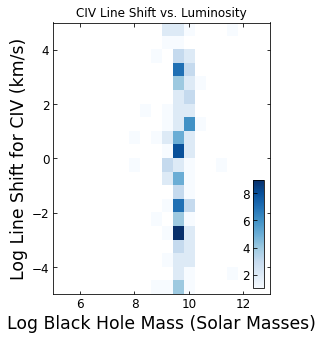

In [67]:
f, ax = plt.subplots(1, 1, figsize=(5,5))

bins = [20, 20]
extent = [[5, 13], [-5,5]]
thresh = 1

# do all of the plotting
xdat = np.log10(bhm_n)
ydat = delta_C4

hh, locx, locy = np.histogram2d(xdat, ydat, range=extent, bins=bins)
posx = np.digitize(xdat, locx)
posy = np.digitize(ydat, locy)

# finds the bins which contain points. posx = 0 for points outside "range"
ind = (posx > 0) & (posx <= bins[0]) & (posy > 0) & (posy <= bins[1])
# values of histogram with points in the bins.
hhsub = hh[posx[ind] - 1, posy[ind] - 1]

xdat1 = xdat[ind][hhsub < thresh]  # low density points
ydat1 = ydat[ind][hhsub < thresh]
hh[hh < thresh] = np.nan  # fill the areas with low density by NaNs

im1 = ax.imshow(hh.T, cmap='Blues', extent=np.array(extent).flatten(),
    interpolation=None)

ax.scatter(xdat1, ydat1, c='#348abd', alpha=0.6, edgecolor='none', s=12)

# put an inset colorbar
axin1 = inset_axes(ax, width='5%', height='40%', loc='lower right')
plt.colorbar(im1, cax=axin1, orientation='vertical', ticks=[2,4,6,8])
axin1.yaxis.set_ticks_position('left')
ax.set_xlabel('Log Black Hole Mass (Solar Masses)')
ax.set_ylabel('Log Line Shift for CIV (km/s)')
ax.set_title('CIV Line Shift vs. Luminosity')
#plt.savefig('C4LineShift_vs_BlackHole.png')

/home/ray/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


Text(0.5, 1.0, 'MgII Line Shift vs. Black Hole Mass')

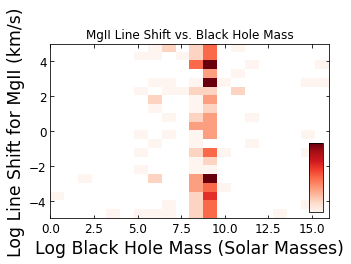

In [64]:
f, ax = plt.subplots(1, 1, figsize=(5,5))

bins = [20, 20]
extent = [[0, 16], [-5, 5]]
thresh = 1

# do all of the plotting
xdat = np.log10(bhm_mg)
ydat = delta_Mg

hh, locx, locy = np.histogram2d(xdat, ydat, range=extent, bins=bins)
posx = np.digitize(xdat, locx)
posy = np.digitize(ydat, locy)

# finds the bins which contain points. posx = 0 for points outside "range"
ind = (posx > 0) & (posx <= bins[0]) & (posy > 0) & (posy <= bins[1])
# values of histogram with points in the bins.
hhsub = hh[posx[ind] - 1, posy[ind] - 1]

xdat1 = xdat[ind][hhsub < thresh]  # low density points
ydat1 = ydat[ind][hhsub < thresh]
hh[hh < thresh] = np.nan  # fill the areas with low density by NaNs

im2 = ax.imshow(hh.T, cmap='Reds', extent=np.array(extent).flatten(),
    interpolation=None)

ax.scatter(xdat1, ydat1, c='red', alpha=0.6, edgecolor='none', s=12)

# put an inset colorbar
axin2 = inset_axes(ax, width='5%', height='40%', loc='lower right')
plt.colorbar(im2, cax=axin2, orientation='vertical', ticks=[10,30,50,70])
axin2.yaxis.set_ticks_position('left')
ax.set_xlabel('Log Black Hole Mass (Solar Masses)')
ax.set_ylabel('Log Line Shift for MgII (km/s)')
ax.set_title('MgII Line Shift vs. Black Hole Mass')
#plt.savefig('MgIILineShift_vs_BlackHole.png')